# Table of Contents
1. [Importing Necessary Libraries](#importing-necessary-libraries)
2. [Skewness](#skewness)
3. [Outliers Check](#outliers-check)
4. Check for Invalid Values
5. Univariate Analysis
6. Distribution of Data Across Labels
7. Checking for Missing Values and Fixing them
8. [Multivariate Analysis](#multivariate-analysis)

## Importing Necessary Libraries

In [53]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
#matplotlib, keras, tensorflow, sklearn, 

In [113]:
data = pd.read_csv(r'C:\Users\ASUS\Desktop\Multilabel Classification Project for Predicting Shipment Modes\Data\transport_shipment_data.csv')

In [4]:
data.shape

(2000, 20)

In [5]:
data.columns

Index(['Product Id', 'Net Weight', 'Size', 'Value', 'Storage',
       'Packaging Cost', 'Expiry Period', 'Length', 'Height', 'Width',
       'Volume', 'Perishable Index', 'Flammability Index', 'F145', 'F7987',
       'F992', 'Air', 'Road', 'Rail', 'Sea'],
      dtype='object')

In [64]:
data.head(5)

,Product Id,Net Weight,Size,Value,Storage,Packaging Cost,Expiry Period,Length,Height,Width,Volume,Perishable Index,Flammability Index,F145,F7987,F992,Air,Road,Rail,Sea
0,8c54Qe7RDn282Mopja7dUq,0.231087,A,-0.489163,0,0.019398,0.749709,-0.444208,0.634931,0.712466,-0.089034,-0.456208,0.832768,-0.136432,-0.444208,-0.089034,1,0,0,0
1,MxcoJYgBCccRhusziJSHm7,0.113633,D,-0.632586,0,0.300071,0.729867,-0.413723,0.574507,0.320112,0.039395,-0.552568,0.662736,0.017452,-0.413723,0.039395,1,0,0,0
2,GMakRsbTjkRo9t6SyPmgiZ,0.093890,E,-0.825227,0,0.199524,0.714021,-0.597498,0.739483,0.405020,0.127866,-0.717124,-0.569244,-0.595166,-0.597498,NaN,1,0,1,0
3,TY2X3ieWcBtUzhbT4JpbY9,0.134954,D,-0.413436,0,-0.049054,0.748012,-0.606818,0.679655,0.374227,-0.284391,0.881933,0.939153,-0.377911,-0.606818,-0.284391,1,0,0,1
4,2hRnYVqZ9abtarprshAkpA,0.026086,C,-0.855886,0,0.209520,0.730373,-0.379819,0.803147,0.523394,-0.034948,0.745789,-0.312293,0.814900,-0.379819,-0.034948,1,1,0,0


In [55]:
numerical_data = data.select_dtypes(include=['number'])

stats = numerical_data.agg(['min', 'mean', 'max']).transpose()  # transpose to align with your format
stats['NumMissing'] = numerical_data.isnull().sum()

stats.columns = ['Min', 'Avg', 'Max', 'NumMissing']

stats.reset_index(inplace=True)
stats.rename(columns={'index': 'Name'}, inplace=True)

stats

,Name,Min,Avg,Max,NumMissing
0,Net Weight,-0.988196,-0.057748,0.913435,0
1,Value,-0.895737,-0.090483,0.958518,0
2,Storage,-1.000000,-0.535500,0.000000,0
3,Packaging Cost,-0.956013,-0.130105,0.838401,0
4,Expiry Period,-0.640952,0.196590,0.881765,100
5,Length,-0.854964,-0.035019,0.888716,0
6,Height,-0.989023,-0.199589,0.810998,0
7,Width,-0.928478,0.112865,0.876141,0
8,Volume,-0.959772,0.028498,0.927373,0
9,Perishable Index,-0.997374,0.004832,0.999453,47


## Skewness

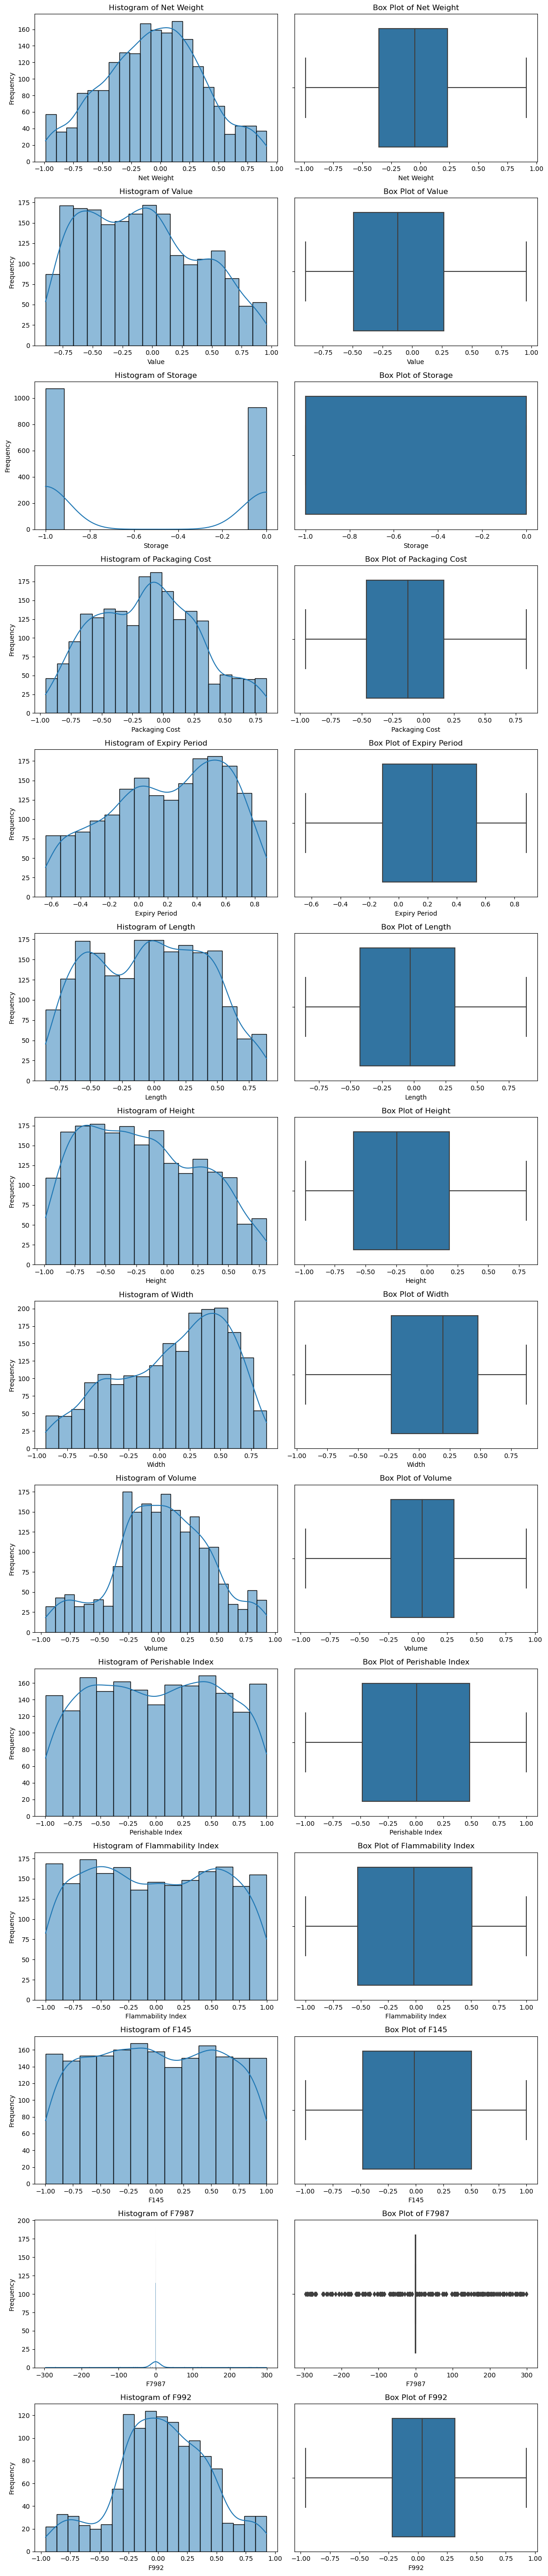

In [61]:
exclude_columns = ['Air', 'Rail', 'Road', 'Sea']
numerical_data = data.select_dtypes(include=['number']).drop(columns=exclude_columns, errors='ignore')

fig, axes = plt.subplots(len(numerical_data.columns), 2, figsize=(12, len(numerical_data.columns) * 4))

for i, col in enumerate(numerical_data.columns):
    
    numerical_data[col].skew()
    
    sns.histplot(numerical_data[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')

    sns.boxplot(x=numerical_data[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {col}')
    axes[i, 1].set_xlabel(col)
    
plt.tight_layout()
plt.show()

## Outliers Check

In [62]:
exclude_columns = ['Air', 'Rail', 'Road', 'Sea']
numerical_data = data.select_dtypes(include=['number']).drop(columns=exclude_columns, errors='ignore')

outliers = {}

for column in numerical_data:
    Q1 = numerical_data[column].quantile(0.25)
    Q3 = numerical_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    condition = (numerical_data[column] < lower_bound) | (numerical_data[column] > upper_bound)
    outliers[column] = numerical_data[column][condition]

for column, values in outliers.items():
    print(f"Outliers in {column} are:\n{values}\n")

Outliers in Net Weight are:
Series([], Name: Net Weight, dtype: float64)

Outliers in Value are:
Series([], Name: Value, dtype: float64)

Outliers in Storage are:
Series([], Name: Storage, dtype: int64)

Outliers in Packaging Cost are:
Series([], Name: Packaging Cost, dtype: float64)

Outliers in Expiry Period are:
Series([], Name: Expiry Period, dtype: float64)

Outliers in Length are:
Series([], Name: Length, dtype: float64)

Outliers in Height are:
Series([], Name: Height, dtype: float64)

Outliers in Width are:
Series([], Name: Width, dtype: float64)

Outliers in Volume are:
Series([], Name: Volume, dtype: float64)

Outliers in Perishable Index are:
Series([], Name: Perishable Index, dtype: float64)

Outliers in Flammability Index are:
Series([], Name: Flammability Index, dtype: float64)

Outliers in F145 are:
Series([], Name: F145, dtype: float64)

Outliers in F7987 are:
11      194.0
21      127.0
28      104.0
31      -68.0
56     -225.0
        ...  
1939   -153.0
1964    284.0

## Check for Invalid Values

In [66]:
data.describe(include=['O'])

,Product Id,Size
count,2000,2000
unique,2000,5
top,8c54Qe7RDn282Mopja7dUq,E
freq,1,661


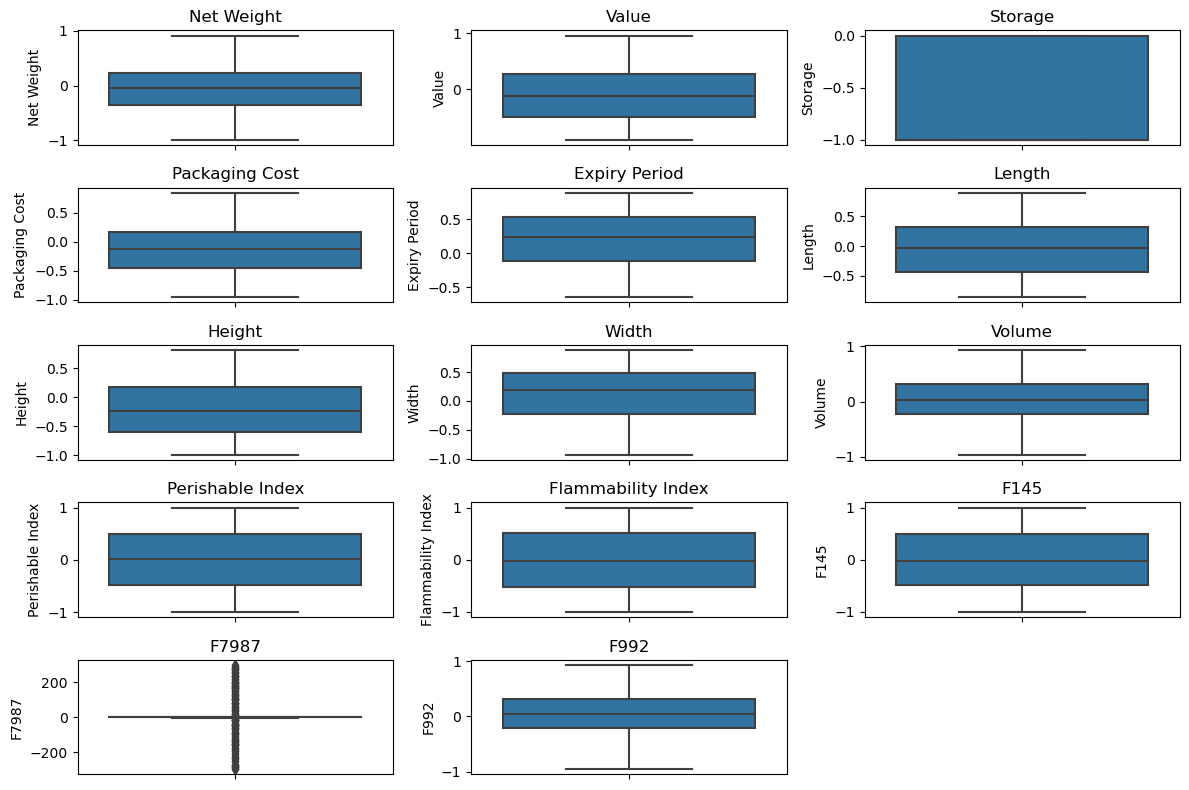

In [76]:
exclude_columns = ['Air', 'Rail', 'Road', 'Sea']
numerical_data = data.select_dtypes(include=['number']).drop(columns=exclude_columns, errors='ignore')

# Plotting boxplots for each numerical feature
plt.figure(figsize=(12, 8))  # Adjust the size as necessary
for i, column in enumerate(numerical_data.columns):
    plt.subplot(len(numerical_data.columns) // 3 + 1, 3, i + 1)  # Arranging plots in a grid
    sns.boxplot(y=numerical_data[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

In [77]:
exclude_columns = ['Air', 'Rail', 'Road', 'Sea']
numerical_data = data.select_dtypes(include=['number']).drop(columns=exclude_columns, errors='ignore')
numerical_data.describe()

,Net Weight,Value,Storage,Packaging Cost,Expiry Period,Length,Height,Width,Volume,Perishable Index,Flammability Index,F145,F7987,F992
count,2000.000000,2000.000000,2000.000000,2000.000000,1900.000000,2000.000000,2000.000000,2000.000000,2000.000000,1953.000000,2000.000000,2000.000000,2000.000000,1254.000000
mean,-0.057748,-0.090483,-0.535500,-0.130105,0.196590,-0.035019,-0.199589,0.112865,0.028498,0.004832,-0.012068,-0.000811,1.417082,0.034505
std,0.426959,0.474489,0.498863,0.416407,0.402677,0.442506,0.467587,0.447880,0.407352,0.569756,0.583143,0.572906,54.867048,0.403657
min,-0.988196,-0.895737,-1.000000,-0.956013,-0.640952,-0.854964,-0.989023,-0.928478,-0.959772,-0.997374,-0.999492,-0.998497,-297.000000,-0.959772
25%,-0.357257,-0.490441,-1.000000,-0.460956,-0.109032,-0.426092,-0.597183,-0.228062,-0.229064,-0.485740,-0.528946,-0.480198,-0.463867,-0.219783
50%,-0.047216,-0.120182,-1.000000,-0.124647,0.232943,-0.029655,-0.242865,0.193170,0.035797,0.009051,-0.020081,-0.014301,-0.014814,0.037910
75%,0.234918,0.267159,0.000000,0.166503,0.536923,0.325439,0.182204,0.478870,0.310353,0.486640,0.507250,0.502217,0.381398,0.315539
max,0.913435,0.958518,0.000000,0.838401,0.881765,0.888716,0.810998,0.876141,0.927373,0.999453,0.999227,0.999786,299.000000,0.927373


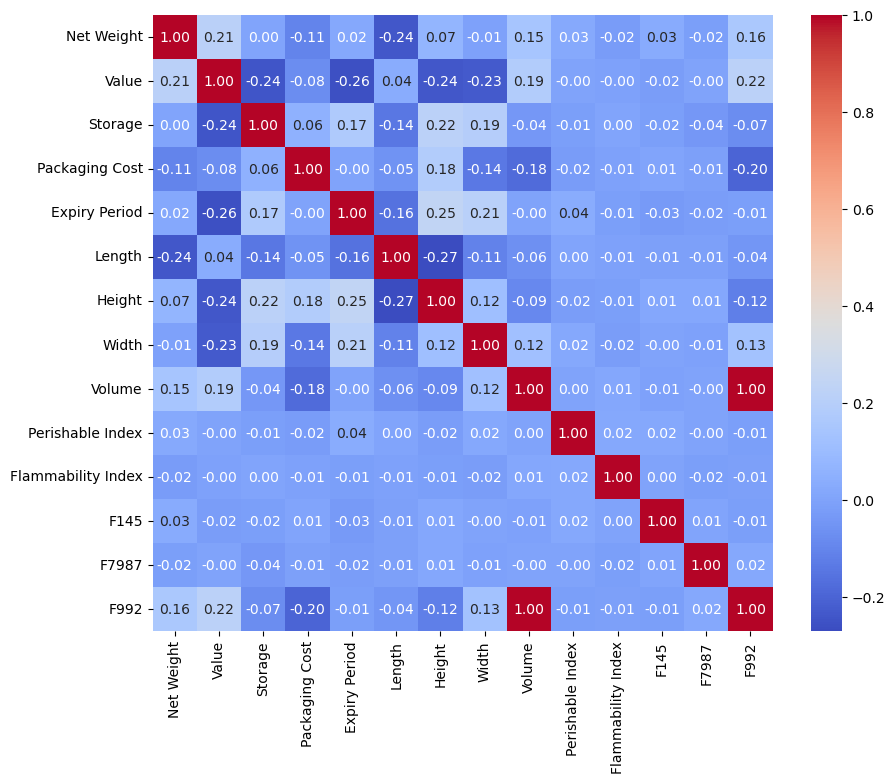

In [82]:
exclude_columns = ['Air', 'Rail', 'Road', 'Sea']
numerical_data = data.select_dtypes(include=['number']).drop(columns=exclude_columns, errors='ignore')

corr_matrix = numerical_data.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

## Checking Correlation of each feature with each target variable

In [85]:
targets = ['Air', 'Road', 'Rail', 'Sea']

correlation_dict = {}

for target in targets:
    correlation_dict[target] = data.drop(columns=targets).corrwith(data[target])

correlation_df = pd.DataFrame(correlation_dict)

correlation_df

,Air,Road,Rail,Sea
Net Weight,0.078227,-0.354798,0.374284,-0.163519
Value,-0.342554,-0.093526,0.474944,-0.188487
Storage,0.297259,-0.090359,-0.161553,0.045654
Packaging Cost,0.126390,0.281174,-0.284238,-0.243864
Expiry Period,0.316882,-0.144856,-0.147725,0.098152
Length,-0.340404,0.326204,-0.082885,0.187941
Height,0.418338,-0.116384,-0.220321,-0.164749
Width,0.259919,-0.306467,-0.045339,0.275675
Volume,-0.028608,-0.299375,0.355123,0.112701
Perishable Index,0.007723,-0.010707,-0.021008,0.001243


## Univariate Analysis

### Distribution of data across labels

In [54]:
print('Percentage of products suitable for Air transport:', 100.0*sum(data['Air'])/data.shape[0], '%')
print('Percentage of products suitable for Road transport:', 100.0*sum(data['Road'])/data.shape[0], '%')
print('Percentage of products suitable for Rail transport:', 100.0*sum(data['Rail'])/data.shape[0], '%')
print('Percentage of products suitable for Sea transport:', 100.0*sum(data['Sea'])/data.shape[0], '%')

Percentage of products suitable for Air transport: 21.1 %
Percentage of products suitable for Road transport: 58.6 %
Percentage of products suitable for Rail transport: 42.15 %
Percentage of products suitable for Sea transport: 27.1 %


### Checking for missing values and fixing them

In [35]:
data.isnull().any()[data.isnull().any()]

Expiry Period       True
Perishable Index    True
F992                True
dtype: bool

In [40]:
print('Percentage of null values in Expiry Period column is:', 100.0*data['Expiry Period'].isnull().sum()/data.shape[0], '%')
print('Percentage of null values in Perishable Index column is:', 100.0*data['Perishable Index'].isnull().sum()/data.shape[0], '%')
print('Percentage of null values in F992 column is:', 100.0*data['F992'].isnull().sum()/data.shape[0], '%')

Percentage of null values in Expiry Period column is: 5.0 %
Percentage of null values in Perishable Index column is: 2.35 %
Percentage of null values in F992 column is: 37.3 %


## Multivariate Analysis

In [63]:
sizes = ['A', 'B', 'C', 'D', 'E']
results = {}

for size in sizes:
    filtered_data = data[data['Size'] == size]
    
    max_weight = filtered_data['Net Weight'].max()
    min_weight = filtered_data['Net Weight'].min()
    
    results[size] = (max_weight, min_weight)

for size, stats in results.items():
    print(f"Size {size}: Max Net Weight = {stats[0]}, Min Net Weight = {stats[1]}")

Size A: Max Net Weight = 0.84477, Min Net Weight = -0.79077
Size B: Max Net Weight = 0.911488, Min Net Weight = -0.984492
Size C: Max Net Weight = 0.913435, Min Net Weight = -0.988196
Size D: Max Net Weight = 0.895423, Min Net Weight = -0.987158
Size E: Max Net Weight = 0.909991, Min Net Weight = -0.985289


## Data Preparation

## Missing Value Imputation

In [116]:
data['Expiry Period'].fillna(0, inplace = True), data['Perishable Index'].fillna(0, inplace = True), data['F992'].fillna(0, inplace = True)

(None, None, None)

### Categorical Encoding

In [114]:
# Handling Size

one_hot_encoded_data = pd.get_dummies(data['Size'], columns=['Size'])
data = pd.concat([data, one_hot_encoded_data], axis=1)
data.drop('Size', axis=1, inplace=True)
data

,Product Id,Net Weight,Value,Storage,Packaging Cost,Expiry Period,Length,Height,Width,Volume,...,F992,Air,Road,Rail,Sea,A,B,C,D,E
0,8c54Qe7RDn282Mopja7dUq,0.231087,-0.489163,0,0.019398,0.749709,-0.444208,0.634931,0.712466,-0.089034,...,-0.089034,1,0,0,0,1,0,0,0,0
1,MxcoJYgBCccRhusziJSHm7,0.113633,-0.632586,0,0.300071,0.729867,-0.413723,0.574507,0.320112,0.039395,...,0.039395,1,0,0,0,0,0,0,1,0
2,GMakRsbTjkRo9t6SyPmgiZ,0.093890,-0.825227,0,0.199524,0.714021,-0.597498,0.739483,0.405020,0.127866,...,NaN,1,0,1,0,0,0,0,0,1
3,TY2X3ieWcBtUzhbT4JpbY9,0.134954,-0.413436,0,-0.049054,0.748012,-0.606818,0.679655,0.374227,-0.284391,...,-0.284391,1,0,0,1,0,0,0,1,0
4,2hRnYVqZ9abtarprshAkpA,0.026086,-0.855886,0,0.209520,0.730373,-0.379819,0.803147,0.523394,-0.034948,...,-0.034948,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,LLqPXqQJrhcCsLgBhA5yd5,-0.639867,-0.696331,0,-0.732294,NaN,0.355028,-0.198196,0.539760,0.016016,...,0.016016,0,0,0,1,0,0,0,0,1
1996,GatTXXtKuYwkptFhuVFLdJ,-0.133202,0.038537,0,-0.088610,0.056150,0.436331,-0.476401,0.088182,0.030197,...,NaN,0,1,1,1,1,0,0,0,0
1997,R4b2vhhukAuzApzk6FiCtF,-0.628198,-0.156040,0,-0.698798,0.214446,0.269316,-0.482352,0.047523,0.520557,...,0.520557,0,0,0,1,0,0,0,1,0
1998,Nqsiz7BPLFykqvxDNCWSLt,-0.332874,-0.547065,-1,-0.432906,0.424001,0.361119,-0.115445,0.082059,0.163163,...,NaN,0,0,0,1,0,0,0,0,1


### Interview Questions

* Q1: What are the pros and cons of using One-Hot Encoding and Label Encoding?
* Q2: When should One-Hot Encoding be used and when should Label Encoding be used?

## Imbalance Handling

### SMOTE

In [90]:
pip install imbalanced-learn

     -------------------------------------- 258.3/258.3 kB 3.9 MB/s eta 0:00:00
     ------------------------------------- 301.8/301.8 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [91]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [118]:
X = data.drop(['Air', 'Sea', 'Rail', 'Road', 'Product Id'], axis=1)  # Drop other target variables if necessary
y = data['Air']  # Change to 'Sea' accordingly

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [119]:
X.isnull().any()[X.isnull().any()]

Series([], dtype: bool)

In [121]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution`
print("After SMOTE, counts of label '1': {}".format(sum(y_train_smote == 1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_smote == 0)))

After SMOTE, counts of label '1': 1099
After SMOTE, counts of label '0': 1099


### Interview Questions 

* Q1. What is data leakage? How does it happen? When does it happen? How to tackle it?
* Q2. How does SMOTE work and when should it be used and when should it not be used?
* Q3. What are other oversampling techniques? Compare their advantages and disadvantages over SMOTE
* Q4. What is class imbalance, and why is it problematic for machine learning models?
* Q5. Can you explain how SMOTE (Synthetic Minority Over-sampling Technique) helps in dealing with class imbalance?
* Q6. Discuss some potential drawbacks or limitations of using SMOTE in a machine learning pipeline.
* Q7. What alternatives to SMOTE are available for handling imbalanced datasets?
* Q8. How does feature selection play a role in models trained on imbalanced datasets?
* Q9. Provide an example of how you would implement a custom resampling strategy that is not covered by conventional methods like SMOTE or Random Under-sampling.
* Q10. In a dataset with multiple classes that are imbalanced, how would you approach building and evaluating a model?
* Q11. What metrics would you use to evaluate a model trained on an imbalanced dataset and why?

## Modelling

## Cross Validation

In [125]:
from sklearn import model_selection, multioutput, metrics

In [129]:
cv_folds = list(model_selection.KFold(n_splits=5, shuffle=True, random_state=42).split(X))

### Interview Questions 

* Q1. What is K-Fold Cross-Validation and how does it work?
* Q2. In the provided code snippet, the KFold function is used with n_splits=5, shuffle=True, and random_state=42. Can you explain what each of these parameters does? 
* Q3. Why might you choose to set shuffle=True in the KFold function? What are the implications of this choice?
* Q4. The code uses a random_state of 42. What is the significance of setting a random_state in model validation techniques, and how does it affect reproducibility? 
* Q5. How would you integrate SMOTE (Synthetic Minority Over-sampling Technique) with K-Fold cross-validation to handle class imbalance? 
* Q6. What are some potential drawbacks or limitations of using K-Fold cross-validation, particularly in relation to the type of data or specific use cases?
* Q7. If you have time-series data, would K-Fold cross-validation still be an appropriate method to use? Why or why not?
* Q8. How does cross-validation contribute to model tuning, and what are some strategies to implement it effectively? 

## Approach 1 - Independent Models

In [130]:
# multioutput.MultiOutputClassifier(lightgbm.LGBMClassifier(random_seed = 42))

## Approach 2 - Classifier Chain

In [ ]:
# multioutput.ClassifierChain(lightgbm.LGBMClassifier(random_seed=42), order="random", cv=5)

## Approach 3 - Natively Multilabel Models

In [ ]:
# ensemble.ExtraTreesClassifier()

## Approach 4 - Multilabel to Multiclass

## More Interview Questions

* Q1. Can you explain the difference between multilabel classification and multiclass classification?
* Q2. How did you evaluate the performance of the different multilabel classification approaches used in the project?
* Q3. What is cross-validation, and why is it important in machine learning?
* Q4. What is the difference between the Naive Independent Models and the Classifier Chains approaches used in the project?
* Q5. What is the F1 score and why is it a useful metric for evaluating multilabel classifiers?
* Q6. Can you discuss any potential limitations of the project and suggest possible future directions for improvement?
* Q7. Can you explain what is LightGBM, and how is it different from other gradient boosting algorithms?
* Q8. How does the Early Stopping work ?
* Q9. Can you describe how the Extra Trees algorithm works and how it differs from other ensemble-based machine learning algorithms?
* Q10. Can you describe how neural networks work, and how they are used for machine learning problems?
* Q11. What are some of the advantages of using neural networks?
* Q12. Can you explain the backpropagation algorithm used in training neural networks?
* Q13. What are some techniques used to prevent overfitting in neural networks?
* Q14. What are some common activation functions used in neural networks, and how do they affect the model's performance?